In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

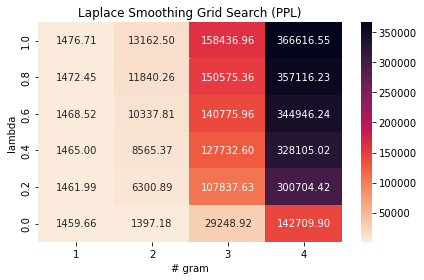

Minimum Perplexity: 1397.1846595571544
n, lambda: 2, 0.0


In [72]:
from collections import defaultdict
file = "laplace/avg_dev_ppl"

data = []

ns = [1,2,3,4]
lambdas = [round(i*0.2, 2) for i in range(6)][::-1]

with open(file, 'r') as f:
    nn = 1
    data.append([])
    row = data[-1]
    for line in f:
        n, l, p = line.strip().split()
        if int(n) == nn:
            row.append(float(p))
        else:
            nn += 1
            data.append([float(p)])
            row = data[-1]
            
data = np.flip(np.array(data).T, axis=0)

f, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax = sns.heatmap(data, xticklabels=ns, yticklabels=lambdas, cmap=sns.cm.rocket_r, annot=True, fmt='.2f')
ax.set_title("Laplace Smoothing Grid Search (PPL)")
ax.set_ylabel("lambda")
ax.set_xlabel("# gram")


plt.show()

print(f"Minimum Perplexity: {data.min()}")
col = np.where(data == np.amin(data))[0][0]
row = np.where(data == np.amin(data))[1][0]
print(f"n, lambda: {ns[row]}, {lambdas[col]}")

[1459.66374312  309.4192795   220.89312565  204.46659476  201.84584944
  201.27181112  201.10283712  201.04723921  201.01814624]


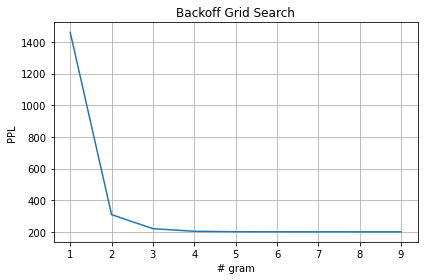

Minimum Perplexity: 201.01814624331337
n: 9


In [75]:
from collections import defaultdict
file = "backoff/avg_dev_ppl"

data = []
ns = [i for i in range(1, 10)]

with open(file, 'r') as f:
    for line in f:
        n, p = line.strip().split()
        data.append(float(p))
        
data = np.array(data)
print(data)

f, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(ns, data)
ax.set_title("Backoff Grid Search")
ax.grid()
ax.set_xlabel("# gram")
ax.set_ylabel("PPL")


plt.show()


print(f"Minimum Perplexity: {data.min()}")
col = np.where(data == np.amin(data))[0][0]
print(f"n: {ns[col]}")

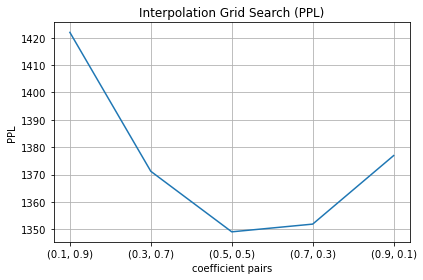

Minimum Perplexity: 1349.031313874311
n: 3


In [76]:
from collections import defaultdict
file = "interpolate/avg_dev_ppl"

data = []
xlabels = [str((round(0.1+i*0.2, 1), round(1-(0.1+i*0.2), 1))) for i in range(5)]

with open(file, 'r') as f:
    nn = 1
    for line in f:
        l1, l2, p = line.strip().split()
        data.append(float(p))
        
data = np.array(data)

f, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(xlabels, data)
ax.grid()
ax.set_title("Interpolation Grid Search (PPL)")
ax.set_xlabel("coefficient pairs")
ax.set_ylabel("PPL")
plt.show()

print(f"Minimum Perplexity: {data.min()}")
col = np.where(data == np.amin(data))[0][0]
print(f"n: {ns[col]}")